محمد امین کاشی
پروژه شماره 2

# Import packages
All the project is written in the wumpus_world.py

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import wumpus_world as ww
import matplotlib.pyplot as plt
from time import sleep

# Evaluation map #1

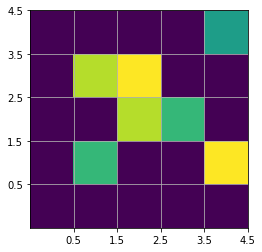

In [3]:
agent = ww.agent(5,5,2,2,2)
agent.plot_map()

# Game Testing

In [3]:
agent.interactive_game()

interactive(children=(RadioButtons(description='movement:', options=('UP', 'RIGHT', 'LEFT', 'DOWN'), value='UP…

## on_policy_MC_control (every visit)

In [4]:
Q_on_MC, N_on_MC, G_log_on_MC = agent.on_policy_MC_control(5000)

0.9998


### Generate an episode based on learned policy

In [5]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_on_MC, s, agent.num_action, 0.1)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break

It needs more iteration for reaching the goal.

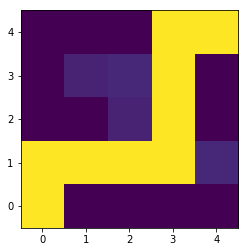

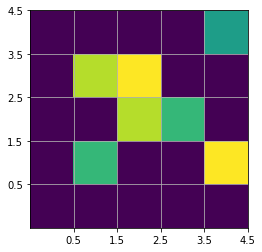

In [6]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

## off_policy_MC_control

In [8]:
Q_MC, C_MC, G_log_MC, pi_MC=agent.off_policy_MC_control(5000)

0.9998


### Generate an episode based on learned policy

In [9]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = np.int16(pi_MC[s])
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r, 1.0/4))
    if r in (ww.REWARD_DEATH, ww.REWARD_WIN):
        break

KeyboardInterrupt: 

It was lucky to learn a pass (most often it finds no pass in this amount of iteration).

In [ ]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

## sarsa_control

In [21]:
Q_sarsa, G_log_sarsa = agent.sarsa_control(5000)

0.9998


### Generate an episode based on learned policy

In [22]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_sarsa, s, agent.num_action, 0)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break

KeyboardInterrupt: 

It gathered all arrows but killed no wumpus.

In [ ]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

## Q_learning_control

In [ ]:
Q_q_learning, G_log_q_learning = agent.Q_learning_control(5000)

### Generate an episode based on learned policy

In [ ]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_q_learning, s, agent.num_action, 0.)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_DEATH, ww.REWARD_WIN):
        break

In [ ]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
    
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

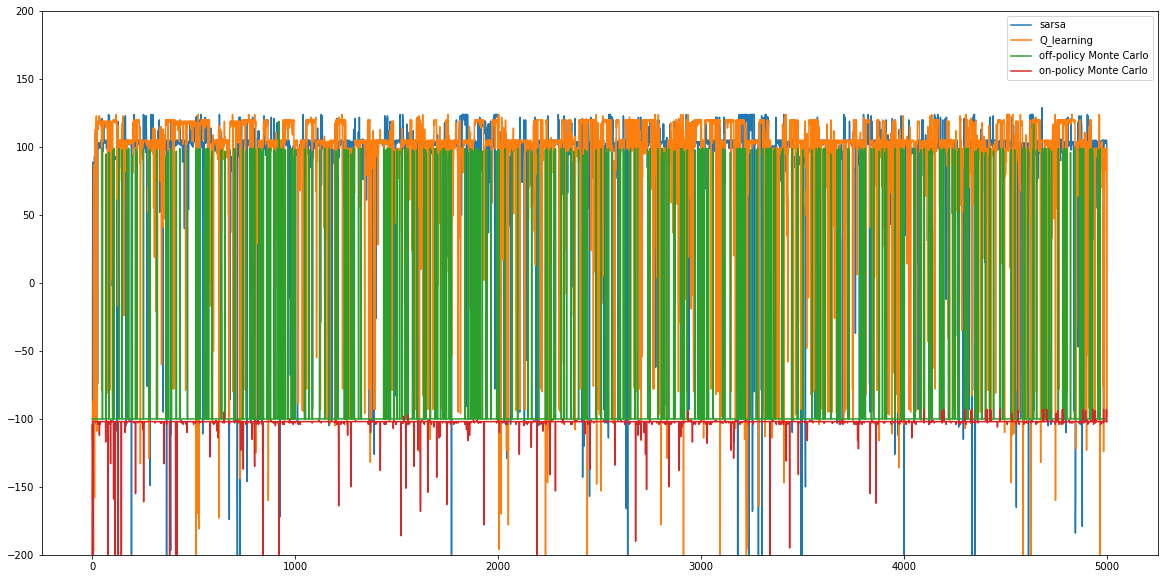

In [32]:
plt.figure(figsize=(20,10))
plt.plot(G_log_sarsa, label = 'sarsa')
plt.plot(G_log_q_learning, label= 'Q_learning')
plt.plot(G_log_MC, label= 'off-policy Monte Carlo')
plt.plot(G_log_on_MC, label= 'on-policy Monte Carlo')
plt.ylim((-200,200))
plt.legend()

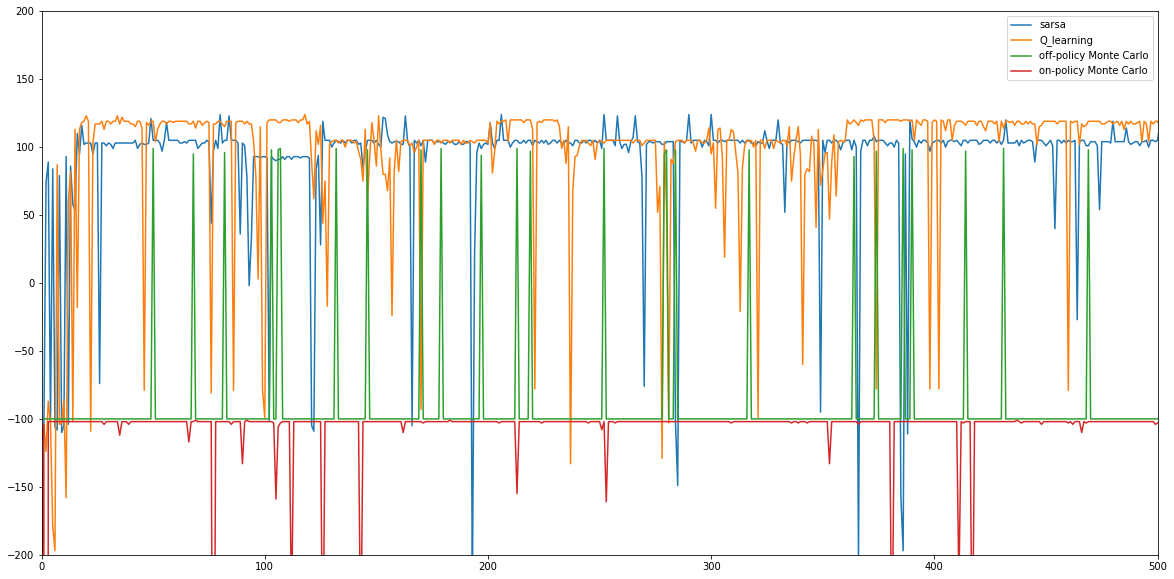

In [34]:
plt.figure(figsize=(20,10))
plt.plot(G_log_sarsa, label = 'sarsa')
plt.plot(G_log_q_learning, label= 'Q_learning')
plt.plot(G_log_MC, label= 'off-policy Monte Carlo')
plt.plot(G_log_on_MC, label= 'on-policy Monte Carlo')
plt.ylim((-200,200))
plt.xlim((0,500))
plt.legend()

## Conclusion:
### Performance rating : 
1. Q-learning
2. SARSA
3. off-policy monte carlo
4. on-policy monte carlo
        

# Evaluation map #2

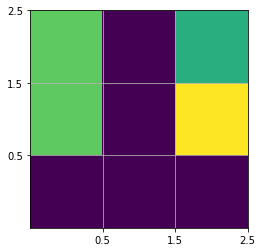

In [40]:
agent = ww.agent(3,3,0,1,2)
agent.plot_map()

In [41]:
Q_on_MC, N_on_MC, G_log_on_MC = agent.on_policy_MC_control(5000)

0.9998


In [42]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_on_MC, s, agent.num_action, 0.1)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break

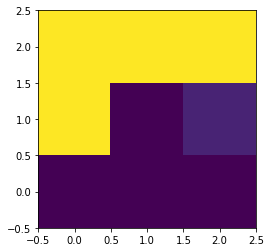

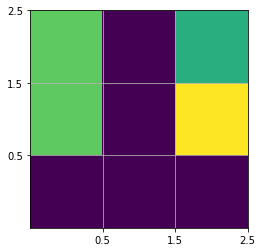

In [43]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

In [48]:
Q_MC, C_MC, G_log_MC, pi_MC=agent.off_policy_MC_control(5000)

0.9998


In [49]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = np.int16(pi_MC[s])
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r, 1.0/4))
    if r in (ww.REWARD_DEATH, ww.REWARD_WIN):
        break

KeyboardInterrupt: 

In [ ]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

In [52]:
Q_sarsa, G_log_sarsa = agent.sarsa_control(5000)

0.9998


In [53]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_sarsa, s, agent.num_action, 0)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break

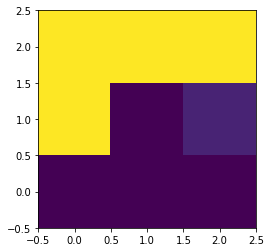

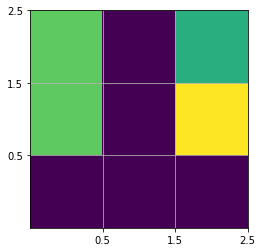

In [54]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

In [55]:
Q_q_learning, G_log_q_learning = agent.Q_learning_control(5000)

0.9998


In [56]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_q_learning, s, agent.num_action, 0.)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_DEATH, ww.REWARD_WIN):
        break

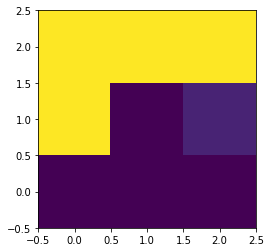

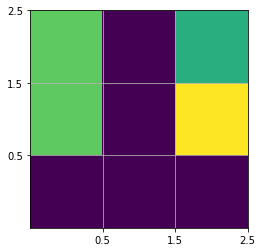

In [57]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
    
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

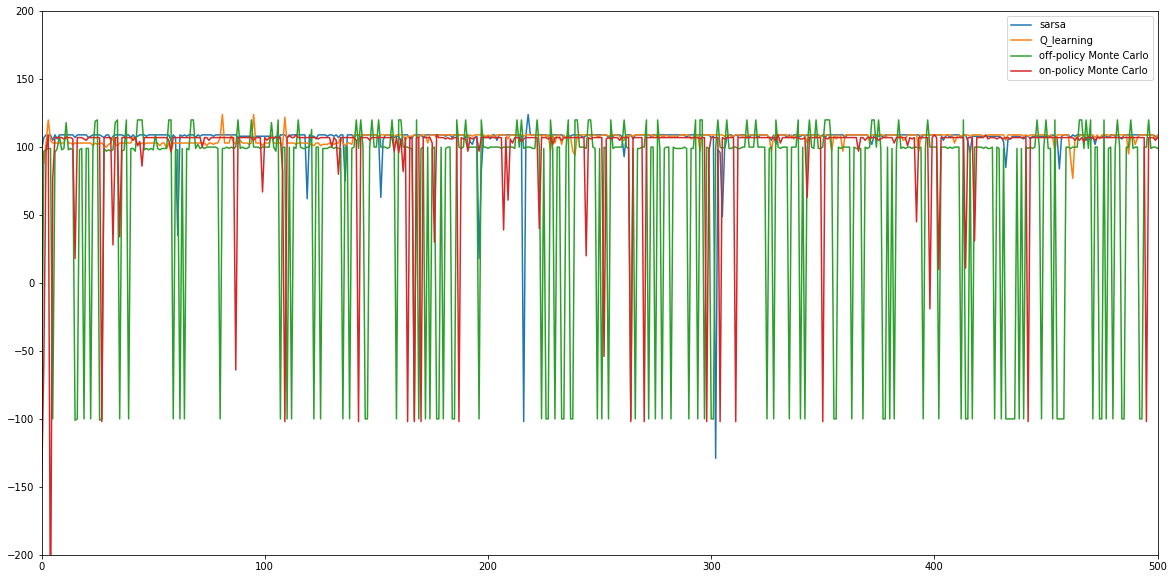

In [58]:
plt.figure(figsize=(20,10))
plt.plot(G_log_sarsa, label = 'sarsa')
plt.plot(G_log_q_learning, label= 'Q_learning')
plt.plot(G_log_MC, label= 'off-policy Monte Carlo')
plt.plot(G_log_on_MC, label= 'on-policy Monte Carlo')
plt.ylim((-200,200))
plt.xlim((0,500))
plt.legend()